https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/  
https://www.analyticsvidhya.com/blog/2016/08/practicing-machine-learning-techniques-in-r-with-mlr-package/  
http://mlr-org.github.io/mlr-tutorial/release/html/integrated_learners/  


### Getting Data

In [9]:
getwd()

[1] "/home/rsouza/MMD/datasets/MLR_Package"

In [12]:
path <- "/home/rsouza/MMD/datasets/AVidhya/"
setwd(path)

In [13]:
#load libraries and data
#install.packages("mlr")
library(mlr)

In [14]:
train <- read.csv("train.csv", na.strings = c(""," ",NA))
test <- read.csv("test.csv", na.strings = c(""," ",NA))

### Exploring Data

In [15]:
summarizeColumns(train)

name,type,na,mean,disp,median,mad,min,max,nlevs
Loan_ID,factor,0,NA,0.9983713,NA,NA,1,1,614
Gender,factor,13,NA,NA,NA,NA,112,489,2
Married,factor,3,NA,NA,NA,NA,213,398,2
Dependents,factor,15,NA,NA,NA,NA,51,345,4
Education,factor,0,NA,0.2182410,NA,NA,134,480,2
Self_Employed,factor,32,NA,NA,NA,NA,82,500,2
ApplicantIncome,integer,0,5403.4592834,6109.0416734,3812.5,1822.8567,150,81000,0
CoapplicantIncome,numeric,0,1621.2457980,2926.2483692,1188.5,1762.0701,0,41667,0
LoanAmount,integer,22,146.4121622,85.5873252,128.0,47.4432,9,700,0
Loan_Amount_Term,integer,14,342.0000000,65.1204099,360.0,0.0000,12,480,0


In [16]:
summarizeColumns(test)

name,type,na,mean,disp,median,mad,min,max,nlevs
Loan_ID,factor,0,NA,0.9972752,NA,NA,1,1,367
Gender,factor,11,NA,NA,NA,NA,70,286,2
Married,factor,0,NA,0.3651226,NA,NA,134,233,2
Dependents,factor,10,NA,NA,NA,NA,40,200,4
Education,factor,0,NA,0.2288828,NA,NA,84,283,2
Self_Employed,factor,23,NA,NA,NA,NA,37,307,2
ApplicantIncome,integer,0,4805.5994550,4910.6853990,3786,1598.2428,0,72529,0
CoapplicantIncome,integer,0,1569.5776567,2334.2320987,1025,1519.6650,0,24000,0
LoanAmount,integer,5,136.1325967,61.3666524,125,38.5476,28,550,0
Loan_Amount_Term,integer,6,342.5373961,65.1566434,360,0.0000,6,480,0


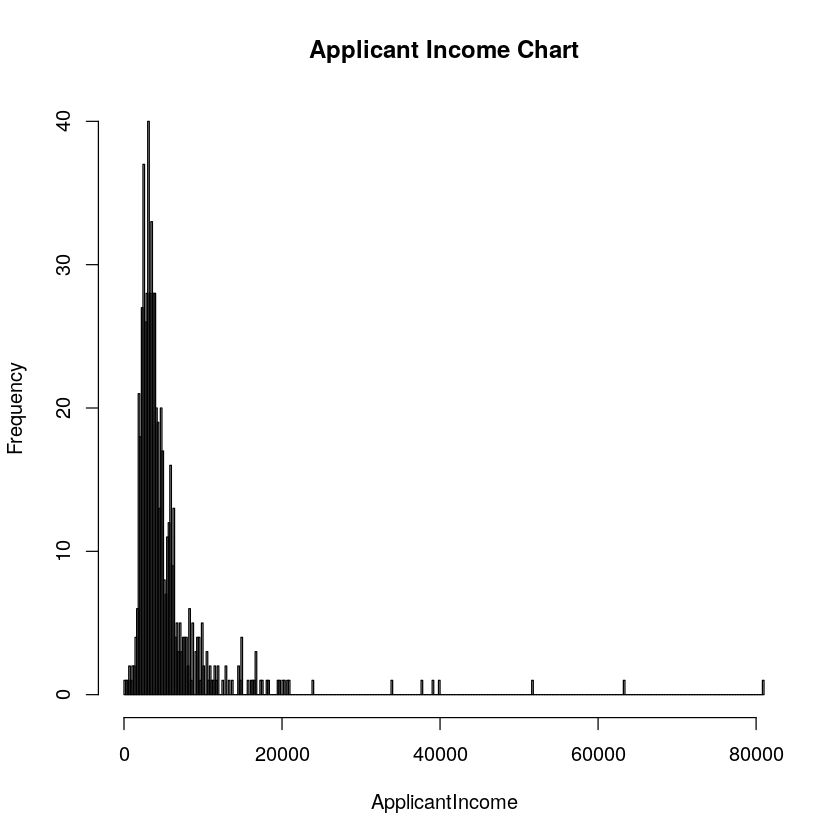

In [17]:
hist(train$ApplicantIncome, breaks = 300, main = "Applicant Income Chart",xlab = "ApplicantIncome")

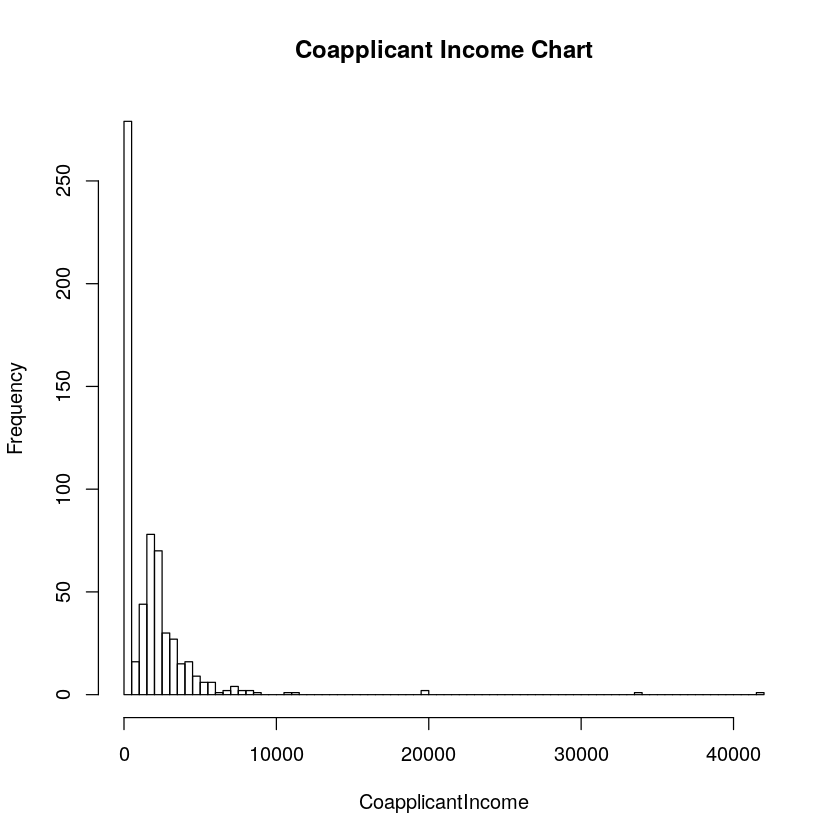

In [18]:
hist(train$CoapplicantIncome, breaks = 100,main = "Coapplicant Income Chart",xlab = "CoapplicantIncome")

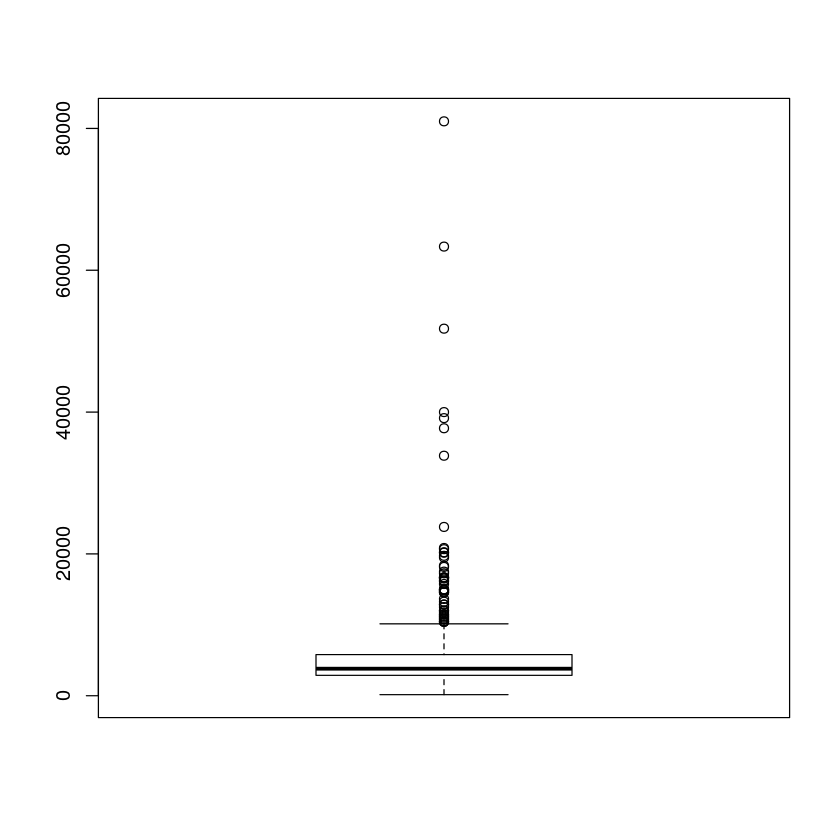

In [19]:
boxplot(train$ApplicantIncome)

In [20]:
train$Credit_History <- as.factor(train$Credit_History)
test$Credit_History <- as.factor(test$Credit_History)

In [21]:
class(train$Credit_History)

[1] "factor"

In [22]:
summary(train)

     Loan_ID       Gender    Married    Dependents        Education  
 LP001002:  1   Female:112   No  :213   0   :345   Graduate    :480  
 LP001003:  1   Male  :489   Yes :398   1   :102   Not Graduate:134  
 LP001005:  1   NA's  : 13   NA's:  3   2   :101                     
 LP001006:  1                           3+  : 51                     
 LP001008:  1                           NA's: 15                     
 LP001011:  1                                                        
 (Other) :608                                                        
 Self_Employed ApplicantIncome CoapplicantIncome   LoanAmount   
 No  :500      Min.   :  150   Min.   :    0     Min.   :  9.0  
 Yes : 82      1st Qu.: 2878   1st Qu.:    0     1st Qu.:100.0  
 NA's: 32      Median : 3812   Median : 1188     Median :128.0  
               Mean   : 5403   Mean   : 1621     Mean   :146.4  
               3rd Qu.: 5795   3rd Qu.: 2297     3rd Qu.:168.0  
               Max.   :81000   Max.   :41667     M

In [23]:
summary(test)

     Loan_ID       Gender    Married   Dependents        Education  
 LP001015:  1   Female: 70   No :134   0   :200   Graduate    :283  
 LP001022:  1   Male  :286   Yes:233   1   : 58   Not Graduate: 84  
 LP001031:  1   NA's  : 11             2   : 59                     
 LP001035:  1                          3+  : 40                     
 LP001051:  1                          NA's: 10                     
 LP001054:  1                                                       
 (Other) :361                                                       
 Self_Employed ApplicantIncome CoapplicantIncome   LoanAmount   
 No  :307      Min.   :    0   Min.   :    0     Min.   : 28.0  
 Yes : 37      1st Qu.: 2864   1st Qu.:    0     1st Qu.:100.2  
 NA's: 23      Median : 3786   Median : 1025     Median :125.0  
               Mean   : 4806   Mean   : 1570     Mean   :136.1  
               3rd Qu.: 5060   3rd Qu.: 2430     3rd Qu.:158.0  
               Max.   :72529   Max.   :24000     Max.   :5

In [24]:
#rename level of Dependents
levels(train$Dependents)[4] <- "3"
levels(test$Dependents)[4] <- "3"

### Missing Value Imputation

In [25]:
#impute missing values by mean and mode
imp <- impute(train, classes = list(factor = imputeMode(), 
                                    integer = imputeMean()), 
              dummy.classes = c("integer","factor"), 
              dummy.type = "numeric")

imp1 <- impute(test, classes = list(factor = imputeMode(), 
                                    integer = imputeMean()), 
               dummy.classes = c("integer","factor"), 
               dummy.type = "numeric")

In [26]:
imp_train <- imp$data
imp_test <- imp1$data

In [28]:
summarizeColumns(imp_train)

name,type,na,mean,disp,median,mad,min,max,nlevs
Loan_ID,factor,0,NA,9.983713e-01,NA,NA,1,1,614
Gender,factor,0,NA,1.824104e-01,NA,NA,112,502,2
Married,factor,0,NA,3.469055e-01,NA,NA,213,401,2
Dependents,factor,0,NA,4.136808e-01,NA,NA,51,360,4
Education,factor,0,NA,2.182410e-01,NA,NA,134,480,2
Self_Employed,factor,0,NA,1.335505e-01,NA,NA,82,532,2
ApplicantIncome,numeric,0,5.403459e+03,6.109042e+03,3812.5,1822.8567,150,81000,0
CoapplicantIncome,numeric,0,1.621246e+03,2.926248e+03,1188.5,1762.0701,0,41667,0
LoanAmount,numeric,0,1.464122e+02,8.403747e+01,129.0,45.2193,9,700,0
Loan_Amount_Term,numeric,0,3.420000e+02,6.437249e+01,360.0,0.0000,12,480,0


In [29]:
summarizeColumns(imp_test)

name,type,na,mean,disp,median,mad,min,max,nlevs
Loan_ID,factor,0,NA,0.9972752,NA,NA,1,1,367
Gender,factor,0,NA,0.1907357,NA,NA,70,297,2
Married,factor,0,NA,0.3651226,NA,NA,134,233,2
Dependents,factor,0,NA,0.4277929,NA,NA,40,210,4
Education,factor,0,NA,0.2288828,NA,NA,84,283,2
Self_Employed,factor,0,NA,0.1008174,NA,NA,37,330,2
ApplicantIncome,numeric,0,4.805599e+03,4910.6853990,3786,1598.2428,0,72529,0
CoapplicantIncome,numeric,0,1.569578e+03,2334.2320987,1025,1519.6650,0,24000,0
LoanAmount,numeric,0,1.361326e+02,60.9460398,126,38.5476,28,550,0
Loan_Amount_Term,numeric,0,3.425374e+02,64.6203656,360,0.0000,6,480,0


In [30]:
listLearners("classif", check.packages = TRUE, properties = "missings")[c("class","package")]

Warning message:
In listLearners.character("classif", check.packages = TRUE, properties = "missings"): The following learners could not be constructed, probably because their packages are not installed:
classif.ada,classif.bartMachine,classif.bdk,classif.blackboost,classif.boosting,classif.bst,classif.C50,classif.cforest,classif.clusterSVM,classif.ctree,classif.cvglmnet,classif.dbnDNN,classif.dcSVM,classif.extraTrees,classif.fnn,classif.gaterSVM,classif.gausspr,classif.gbm,classif.geoDA,classif.glmboost,classif.glmnet,classif.h2o.deeplearning,classif.h2o.gbm,classif.h2o.glm,classif.h2o.randomForest,classif.hdrda,classif.IBk,classif.J48,classif.JRip,classif.kknn,classif.ksvm,classif.LiblineaRL1L2SVC,classif.LiblineaRL1LogReg,classif.LiblineaRL2L1SVC,classif.LiblineaRL2LogReg,classif.LiblineaRL2SVC,classif.LiblineaRMultiClassSVC,classif.linDA,classif.lqa,classif.lssvm,classif.mda,classif.mlp,classif.naiveBayes,classif.neuralnet,classif.nnTrain,classif.nodeHarvest,classif.OneR,classif.pam

class,package
classif.rpart,rpart


In [ ]:
rpart_imp <- impute(train, target = "Loan_Status",
                    classes = list(numeric = imputeLearner(makeLearner("regr.rpart")),
                                   factor = imputeLearner(makeLearner("classif.rpart"))),
                    dummy.classes = c("numeric","factor"),dummy.type = "numeric")

### Feature Engineering

In [ ]:
#for train data set
cd <- capLargeValues(imp_train, target = "Loan_Status",cols = c("ApplicantIncome"),threshold = 40000)
cd <- capLargeValues(cd, target = "Loan_Status",cols = c("CoapplicantIncome"),threshold = 21000)
cd <- capLargeValues(cd, target = "Loan_Status",cols = c("LoanAmount"),threshold = 520)

In [ ]:
#rename the train data as cd_train
cd_train <- cd

In [ ]:
#add a dummy Loan_Status column in test data
imp_test$Loan_Status <- sample(0:1,size = 367,replace = T)

cde <- capLargeValues(imp_test, target = "Loan_Status",cols = c("ApplicantIncome"),threshold = 33000)
cde <- capLargeValues(cde, target = "Loan_Status",cols = c("CoapplicantIncome"),threshold = 16000)
cde <- capLargeValues(cde, target = "Loan_Status",cols = c("LoanAmount"),threshold = 470)

#renaming test data
cd_test <- cde

In [ ]:
summary(cd_train$ApplicantIncome)

In [ ]:
#convert numeric to factor - train
for (f in names(cd_train[, c(14:20)])) 
{
    if( class(cd_train[, c(14:20)] [[f]]) == "numeric")
    {
        levels <- unique(cd_train[, c(14:20)][[f]])
        cd_train[, c(14:20)][[f]] <- as.factor(factor(cd_train[, c(14:20)][[f]], levels = levels))
    }
}

In [ ]:
#convert numeric to factor - test
for (f in names(cd_test[, c(13:18)]))
{
    if( class(cd_test[, c(13:18)] [[f]]) == "numeric")
    {
        levels <- unique(cd_test[, c(13:18)][[f]])
        cd_test[, c(13:18)][[f]] <- as.factor(factor(cd_test[, c(13:18)][[f]], levels = levels))
    }
}

In [ ]:
#Total_Income
cd_train$Total_Income <- cd_train$ApplicantIncome + cd_train$CoapplicantIncome
cd_test$Total_Income <- cd_test$ApplicantIncome + cd_test$CoapplicantIncome

#Income by loan
cd_train$Income_by_loan <- cd_train$Total_Income/cd_train$LoanAmount
cd_test$Income_by_loan <- cd_test$Total_Income/cd_test$LoanAmount

#change variable class
cd_train$Loan_Amount_Term <- as.numeric(cd_train$Loan_Amount_Term)
cd_test$Loan_Amount_Term <- as.numeric(cd_test$Loan_Amount_Term)

#Loan amount by term
cd_train$Loan_amount_by_term <- cd_train$LoanAmount/cd_train$Loan_Amount_Term
cd_test$Loan_amount_by_term <- cd_test$LoanAmount/cd_test$Loan_Amount_Term

In [ ]:
#splitting the data based on class
az <- split(names(cd_train), sapply(cd_train, function(x){ class(x)}))

#creating a data frame of numeric variables
xs <- cd_train[az$numeric]

#check correlation
cor(xs)

In [ ]:
cd_train$Total_Income <- NULL
cd_test$Total_Income <- NULL

In [ ]:
summarizeColumns(cd_train)
summarizeColumns(cd_test)

### Machine Learning

In [ ]:
#create a task
trainTask <- makeClassifTask(data = cd_train,target = "Loan_Status")
testTask <- makeClassifTask(data = cd_test, target = "Loan_Status")

In [ ]:
trainTask

In [ ]:
trainTask <- makeClassifTask(data = cd_train,target = "Loan_Status", positive = "Y")

In [ ]:
str(getTaskData(trainTask))

In [ ]:
#normalize the variables
trainTask <- normalizeFeatures(trainTask,method = "standardize")
testTask <- normalizeFeatures(testTask,method = "standardize")

In [ ]:
trainTask <- dropFeatures(task = trainTask,features = c("Loan_ID","Married.dummy"))

In [ ]:
#Feature importance
im_feat <- generateFilterValuesData(trainTask, method = c("information.gain","chi.squared"))
plotFilterValues(im_feat,n.show = 20)

In [ ]:
#to launch its shiny application
plotFilterValuesGGVIS(im_feat)

#### 1. Quadratic Discriminant Analysis (QDA).

In [ ]:
#load qda 
qda.learner <- makeLearner("classif.qda", predict.type = "response")

#train model
qmodel <- train(qda.learner, trainTask)

#predict on test data
qpredict <- predict(qmodel, testTask)

#create submission file
submit <- data.frame(Loan_ID = test$Loan_ID, Loan_Status = qpredict$data$response)
write.csv(submit, "submit1.csv",row.names = F)

#### 2. Logistic Regression

In [ ]:
#logistic regression
logistic.learner <- makeLearner("classif.logreg",predict.type = "response")

#cross validation (cv) accuracy
cv.logistic <- crossval(learner = logistic.learner,task = trainTask,iters = 3,stratify = TRUE,measures = acc,show.info = F)

In [ ]:
#cross validation accuracy
cv.logistic$aggr

In [ ]:
cv.logistic$measures.test

In [ ]:
#train model
fmodel <- train(logistic.learner,trainTask)
getLearnerModel(fmodel)

#predict on test data
fpmodel <- predict(fmodel, testTask)

#create submission file
submit <- data.frame(Loan_ID = test$Loan_ID, Loan_Status = fpmodel$data$response)
#write.csv(submit, "submit2.csv",row.names = F)

#### 3. Decision Tree

In [ ]:
getParamSet("classif.rpart")

In [ ]:
#make tree learner
makeatree <- makeLearner("classif.rpart", predict.type = "response")

#set 3 fold cross validation
set_cv <- makeResampleDesc("CV",iters = 3L)

In [ ]:
#Search for hyperparameters
gs <- makeParamSet(makeIntegerParam("minsplit",lower = 10, upper = 50),
                   makeIntegerParam("minbucket", lower = 5, upper = 50),
                   makeNumericParam("cp", lower = 0.001, upper = 0.2))

In [ ]:
#do a grid search
gscontrol <- makeTuneControlGrid()

#hypertune the parameters
stune <- tuneParams(learner = makeatree, resampling = set_cv, task = trainTask, par.set = gs, control = gscontrol, measures = acc)

In [ ]:
#check best parameter
stune$x

In [ ]:
#cross validation result
stune$y

In [ ]:
#using hyperparameters for modeling
t.tree <- setHyperPars(makeatree, par.vals = stune$x)

#train the model
t.rpart <- train(t.tree, trainTask)
getLearnerModel(t.rpart)

#make predictions
tpmodel <- predict(t.rpart, testTask)

#create a submission file
submit <- data.frame(Loan_ID = test$Loan_ID, Loan_Status = tpmodel$data$response)
#write.csv(submit, "submit3.csv",row.names = F)

#### 4. Random Forest

In [ ]:
getParamSet("classif.randomForest")

#create a learner
rf <- makeLearner("classif.randomForest", predict.type = "response", par.vals = list(ntree = 200, mtry = 3))
rf$par.vals <- list(
importance = TRUE
)

#set tunable parameters
#grid search to find hyperparameters
rf_param <- makeParamSet(makeIntegerParam("ntree",lower = 50, upper = 500),
                         makeIntegerParam("mtry", lower = 3, upper = 10),
                         makeIntegerParam("nodesize", lower = 10, upper = 50))

#let's do random search for 50 iterations
rancontrol <- makeTuneControlRandom(maxit = 50L)

In [ ]:
#set 3 fold cross validation
set_cv <- makeResampleDesc("CV",iters = 3L)

#hypertuning
rf_tune <- tuneParams(learner = rf, resampling = set_cv, task = trainTask, par.set = rf_param, control = rancontrol, measures = acc)

In [ ]:
#cv accuracy
rf_tune$y

In [ ]:
#best parameters
rf_tune$x

In [ ]:
#using hyperparameters for modeling
rf.tree <- setHyperPars(rf, par.vals = rf_tune$x)

#train a model
rforest <- train(rf.tree, trainTask)
getLearnerModel(t.rpart)

#make predictions
rfmodel <- predict(rforest, testTask)

#submission file
submit <- data.frame(Loan_ID = test$Loan_ID, Loan_Status = rfmodel$data$response)
#write.csv(submit, "submit4.csv",row.names = F)

#### 5. SVM

In [ ]:
#load svm
getParamSet("classif.ksvm") #do install kernlab package 
ksvm <- makeLearner("classif.ksvm", predict.type = "response")

#Set parameters
pssvm <- makeParamSet(makeDiscreteParam("C", values = 2^c(-8,-4,-2,0)), #cost parameters
                      makeDiscreteParam("sigma", values = 2^c(-8,-4,0,4)) #RBF Kernel Parameter)

In [ ]:
#specify search function
ctrl <- makeTuneControlGrid()

In [ ]:
#tune model
res <- tuneParams(ksvm, task = trainTask, resampling = set_cv, par.set = pssvm, control = ctrl,measures = acc)

In [ ]:
#CV accuracy
res$y

In [ ]:
#set the model with best params
t.svm <- setHyperPars(ksvm, par.vals = res$x)

In [ ]:
#train
par.svm <- train(ksvm, trainTask)

In [ ]:
#test
predict.svm <- predict(par.svm, testTask)

In [ ]:
#submission file
submit <- data.frame(Loan_ID = test$Loan_ID, Loan_Status = predict.svm$data$response)
write.csv(submit, "submit5.csv",row.names = F)

#### 6. GBM

In [ ]:
#load GBM
getParamSet("classif.gbm")
g.gbm <- makeLearner("classif.gbm", predict.type = "response")

#specify tuning method
rancontrol <- makeTuneControlRandom(maxit = 50L)

#3 fold cross validation
set_cv <- makeResampleDesc("CV",iters = 3L)

In [ ]:
#parameters
gbm_par<- makeParamSet(makeDiscreteParam("distribution", values = "bernoulli"),
                       makeIntegerParam("n.trees", lower = 100, upper = 1000), #number of trees
                       makeIntegerParam("interaction.depth", lower = 2, upper = 10), #depth of tree
                       makeIntegerParam("n.minobsinnode", lower = 10, upper = 80),
                       makeNumericParam("shrinkage",lower = 0.01, upper = 1)
                      )

In [ ]:
#tune parameters
tune_gbm <- tuneParams(learner = g.gbm, task = trainTask,resampling = set_cv,measures = acc,par.set = gbm_par,control = rancontrol)

#check CV accuracy
tune_gbm$y

#set parameters
final_gbm <- setHyperPars(learner = g.gbm, par.vals = tune_gbm$x)

#train
to.gbm <- train(final_gbm, traintask)

#test 
pr.gbm <- predict(to.gbm, testTask)

#submission file
submit <- data.frame(Loan_ID = test$Loan_ID, Loan_Status = pr.gbm$data$response)
write.csv(submit, "submit6.csv",row.names = F)

#### 7. Xgboost

In [ ]:
#load xgboost
set.seed(1001)
getParamSet("classif.xgboost")

#make learner with inital parameters
xg_set <- makeLearner("classif.xgboost", predict.type = "response")
xg_set$par.vals <- list(objective = "binary:logistic",eval_metric = "error",nrounds = 250)

In [ ]:
#define parameters for tuning
xg_ps <- makeParamSet(makeIntegerParam("nrounds",lower=200,upper=600),
                      makeIntegerParam("max_depth",lower=3,upper=20),
                      makeNumericParam("lambda",lower=0.55,upper=0.60),
                      makeNumericParam("eta", lower = 0.001, upper = 0.5),
                      makeNumericParam("subsample", lower = 0.10, upper = 0.80),
                      makeNumericParam("min_child_weight",lower=1,upper=5),
                      makeNumericParam("colsample_bytree",lower = 0.2,upper = 0.8))

In [ ]:
#define search function
rancontrol <- makeTuneControlRandom(maxit = 100L) #do 100 iterations

#3 fold cross validation
set_cv <- makeResampleDesc("CV",iters = 3L)

#tune parameters
xg_tune <- tuneParams(learner = xg_set, task = trainTask, resampling = set_cv,measures = acc,par.set = xg_ps, control = rancontrol)

#set parameters
xg_new <- setHyperPars(learner = xg_set, par.vals = xg_tune$x)

#train model
xgmodel <- train(xg_new, trainTask)

#test model
predict.xg <- predict(xgmodel, testTask)

#submission file
submit <- data.frame(Loan_ID = test$Loan_ID, Loan_Status = predict.xg$data$response)
#write.csv(submit, "submit7.csv",row.names = F)

In [ ]:
#selecting top 6 important features
top_task <- filterFeatures(trainTask, method = "rf.importance", abs = 6)